In [ ]:
import numpy as np
import networkx as nx
import json
import pandas as pd

In [ ]:
DIR = ''

In [ ]:
dataset = 'epi_stratified_sample.json'

In [ ]:
graphs = []

In [ ]:
with open(DIR + dataset) as ff:
    temp = [g for g in json.load(ff)]
    graphs.extend(temp)

In [ ]:
df = pd.DataFrame(graphs)

In [ ]:
df.head()

,directed,multigraph,graph,nodes,links
0,True,False,"{'source_doc': 'PMID-19196961', 'dataset': 'ep...","[{'type': 'Ubiquitination', 'name': 'ubiquitin...","[{'key': 'Theme', 'event_id': 'E3', 'source': ..."
1,True,False,"{'source_doc': 'PMID-17989425', 'dataset': 'ep...","[{'type': 'Protein', 'name': 'p53', 'embedding...","[{'key': 'Theme', 'event_id': 'E1', 'source': ..."
2,True,False,"{'source_doc': 'PMID-17601874', 'dataset': 'ep...","[{'type': 'Protein', 'name': 'TbPRMT5', 'embed...","[{'key': 'Theme', 'event_id': 'E1', 'source': ..."
3,True,False,"{'source_doc': 'PMID-19786094', 'dataset': 'ep...","[{'type': 'Phosphorylation', 'name': 'phosphor...","[{'key': 'Theme', 'event_id': 'E11', 'source':..."
4,True,False,"{'source_doc': 'PMID-18805587', 'dataset': 'ep...","[{'type': 'Catalysis', 'name': 'auto-hydroxyla...","[{'key': 'Theme', 'event_id': 'E4', 'source': ..."


# # Event graphs

In [ ]:
num_graphs = len(df)
num_graphs

1002

##Average nodes

In [ ]:
# Obtain a list with the information of each node in each graph
nodes_list = [n[1] for n in df['nodes'].items()]

In [ ]:
len_nodes = [len(nodes_list[i]) for i in range(len(df))]

In [ ]:
max(len_nodes), min(len_nodes)

(6, 2)

In [ ]:
avg_nodes = np.mean(len_nodes)
avg_nodes

2.845309381237525

# Average edges

In [ ]:
edges_list = [n[1] for n in df['links'].items()]

In [ ]:
len_edges = [len(edges_list[i]) for i in range(len(df))]

In [ ]:
avg_edges = np.mean(len_edges)
avg_edges

1.8562874251497006

# # Event types (root)

In [ ]:
roots = [g[1]['root'] for g in df['graph'].items()]

In [ ]:
# For each event graph, we take the type information from the trigger node (id matching)
event_type = [n['type'] for i in range(len(graphs)) for n in nodes_list[i] if n['id'] == roots[i]] 

In [ ]:
df['event_type'] = event_type

In [ ]:
set(event_type)

{'Acetylation',
 'Catalysis',
 'DNA_methylation',
 'Deacetylation',
 'Deglycosylation',
 'Glycosylation',
 'Hydroxylation',
 'Methylation',
 'Phosphorylation',
 'Ubiquitination'}

In [ ]:
len(set(event_type))

10

# # Entity types (root)

In [ ]:
# For each event graph, we take the type information from all the nodes except the trigger node (id matching)
entity_type = [n['type'] for i in range(len(graphs)) for n in nodes_list[i] if n['id'] != roots[i]] 

In [ ]:
set(entity_type)

{'Acetylation',
 'DNA_methylation',
 'Deglycosylation',
 'Demethylation',
 'Deubiquitination',
 'Entity',
 'Hydroxylation',
 'Methylation',
 'Phosphorylation',
 'Protein',
 'Ubiquitination'}

In [ ]:
len(set(entity_type))

11

# Edge labels

In [ ]:
edges_type = [el[0]['key'] for el in edges_list]

In [ ]:
len(set(edges_type))

1

### Node range 

In [ ]:
lenghts = [len(nodes_list[i]) for i in range(len(df))]

In [ ]:
df['len'] = lenghts

### Introducing a range for event graph size

Starting from the event graph distribution for each graph size, a reasonable splitting on #nodes is 2, 3, 4, 5, 6, > 7.

In [ ]:
df['range_len'] = df['len'].copy()

In [ ]:
df['range_len'][df['len'] >= 7] = 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['range_len'] = [str(n) for n in df['range_len']]

## Distribution

In [ ]:
print(df['event_type'].value_counts())

Methylation        176
DNA_methylation    166
Glycosylation      141
Acetylation        137
Catalysis          131
Ubiquitination      93
Phosphorylation     67
Hydroxylation       66
Deacetylation       15
Deglycosylation     10
Name: event_type, dtype: int64


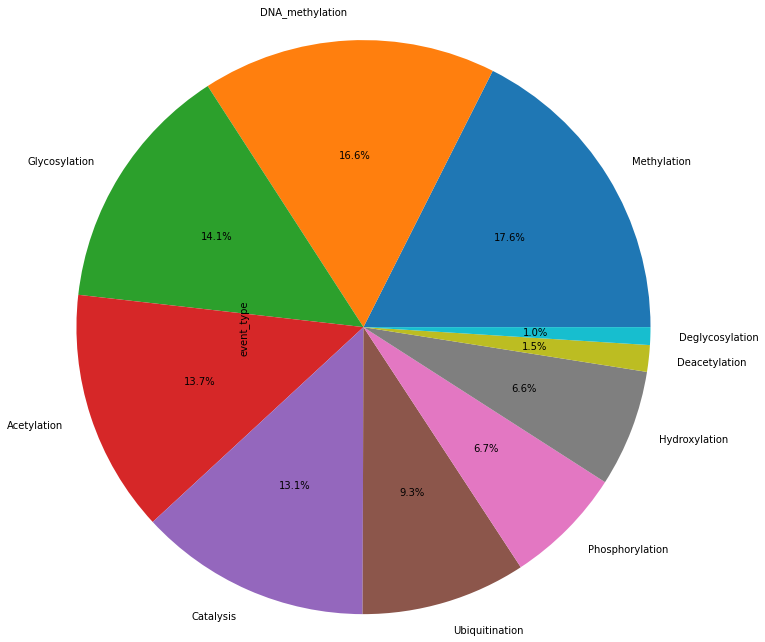

In [ ]:
df['event_type'].value_counts().plot.pie(autopct='%1.1f%%',radius=3.3)

In [ ]:
print(df['range_len'].value_counts())

2    443
3    347
4    149
5     50
6     13
Name: range_len, dtype: int64
